In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [2]:
filename = '../colliders.csv'
data = np.loadtxt(filename,delimiter=',',dtype='Float64',skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [3]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('planning_utils.py'))))
from planning_utils import create_grid

In [4]:
TARGET_ALTITUDE = 5
SAFETY_DISTANCE = 5

In [5]:
grid, north_offset, east_offset  = create_grid(data, TARGET_ALTITUDE, SAFETY_DISTANCE)
grid_zero, _, _ = create_grid(data, TARGET_ALTITUDE, 0)
print("North offset = {0}, east offset = {1}".format(north_offset, east_offset))

North offset = -316, east offset = -445


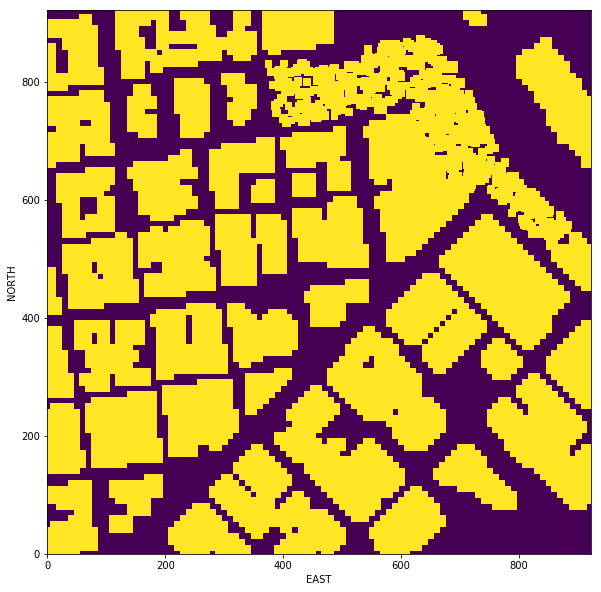

In [6]:
def visualize_grid(g):
    """
    Visualize the provided `g`
    """
    fig = plt.figure(figsize=(20,10))   
    plt.imshow(g, origin='lower') 

    plt.xlabel('EAST')
    plt.ylabel('NORTH')
    plt.show()
    
visualize_grid(grid)

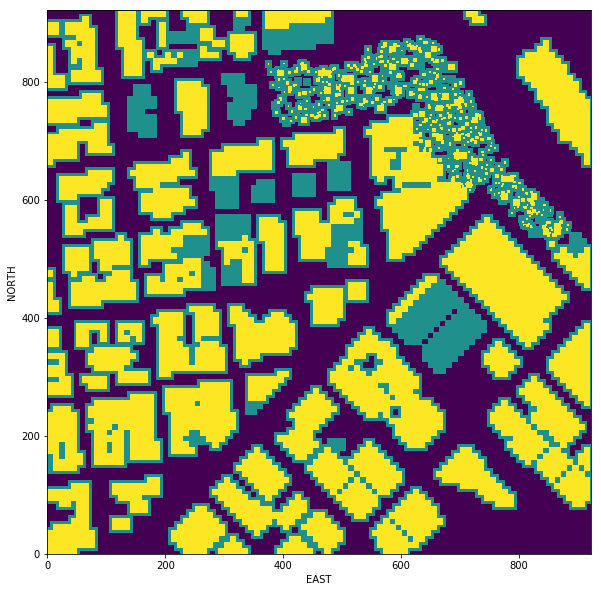

In [7]:
visualize_grid(grid+grid_zero)

In [ ]:
def create_voxmap(data, voxel_size=5):
    """
    Returns a grid representation of a 3D configuration space
    based on given obstacle data.
    
    The `voxel_size` argument sets the resolution of the voxel map. 
    """
    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    # maximum altitude
    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5]))
    
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min))) // voxel_size
    east_size = int(np.ceil((east_max - east_min))) // voxel_size
    alt_size = int(alt_max) // voxel_size

    # Create an empty grid
    voxmap = np.zeros((north_size, east_size, alt_size), dtype=np.bool)
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])
    for i in range(data.shape[0]):
        # TODO: fill in the voxels that are part of an obstacle with `True`
        #
        # i.e. grid[0:5, 20:26, 2:7] = True
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        obstacle = [
            int(north - d_north - north_min_center) // voxel_size,
            int(north + d_north - north_min_center) // voxel_size,
            int(east - d_east - east_min_center) // voxel_size,
            int(east + d_east - east_min_center) // voxel_size,
        ]
        height = int(alt + d_alt) // voxel_size
        voxmap[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3], 0:height] = True

    return voxmap

In [ ]:
voxmap = create_voxmap(data, 10)
print(voxmap.shape)

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.voxels(voxmap, edgecolor='k')
ax.set_xlim(voxmap.shape[0], 0)
ax.set_ylim(0, voxmap.shape[1])
# add a bit to z-axis height for visualization
ax.set_zlim(0, voxmap.shape[2])

plt.xlabel('North')
plt.ylabel('East')

plt.show()